In [1]:
#Importação das bibliotecas
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [3]:
# Leitura da base de dados
dados_lim_cred_esc = pd.read_csv(
    "/home/wilber/Documentos/wilber@outlook.com/Estudos/FIA/Estatística Aplicada/Aula 22 - Python/Limite_Credito_Escolaridade.txt", sep="\t")
dados_lim_cred_esc.head()

,Idade,RendimentoTotal,Salario,LimitedeCreditoImediato,LimitedoChequeEspecial,Escolaridade
0,70,10736,5214,400,500,Fundamental_Medio
1,68,5000,5000,380,600,Fundamental_Medio
2,44,5800,5800,500,800,Fundamental_Medio
3,72,4300,4300,2000,1000,Fundamental_Medio
4,75,4400,4400,3000,1000,Fundamental_Medio


In [4]:
# Mostra o nome das colunas
dados_lim_cred_esc.columns 

Index(['Idade', 'RendimentoTotal', 'Salario', 'LimitedeCreditoImediato',
       'LimitedoChequeEspecial', 'Escolaridade'],
      dtype='object')

In [5]:
# Mostra o tipo de variável
dados_lim_cred_esc.dtypes

Idade                       int64
RendimentoTotal             int64
Salario                     int64
LimitedeCreditoImediato     int64
LimitedoChequeEspecial      int64
Escolaridade               object
dtype: object

In [6]:
# Mostra a estrutura da matriz de dados
dados_lim_cred_esc.shape 

(48, 6)

In [12]:
# Análise Exploratória Univariada
# dados_lim_cred.describe() usando a tranposição da matriz de dados com transpose()
dados_lim_cred_esc.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
Idade,48.0,60.979167,15.049549,30.0,47.0,66.0,70.00,94.0
RendimentoTotal,48.0,12275.083333,12640.654241,4300.0,6380.0,8400.0,12378.25,81000.0
Salario,48.0,10507.125000,9332.173617,4027.0,5950.0,7400.0,10163.00,54500.0
LimitedeCreditoImediato,48.0,2175.208333,938.094469,340.0,1925.0,2000.0,3000.00,3500.0
LimitedoChequeEspecial,48.0,5620.729167,6131.900367,500.0,2262.5,3550.0,6500.00,35000.0


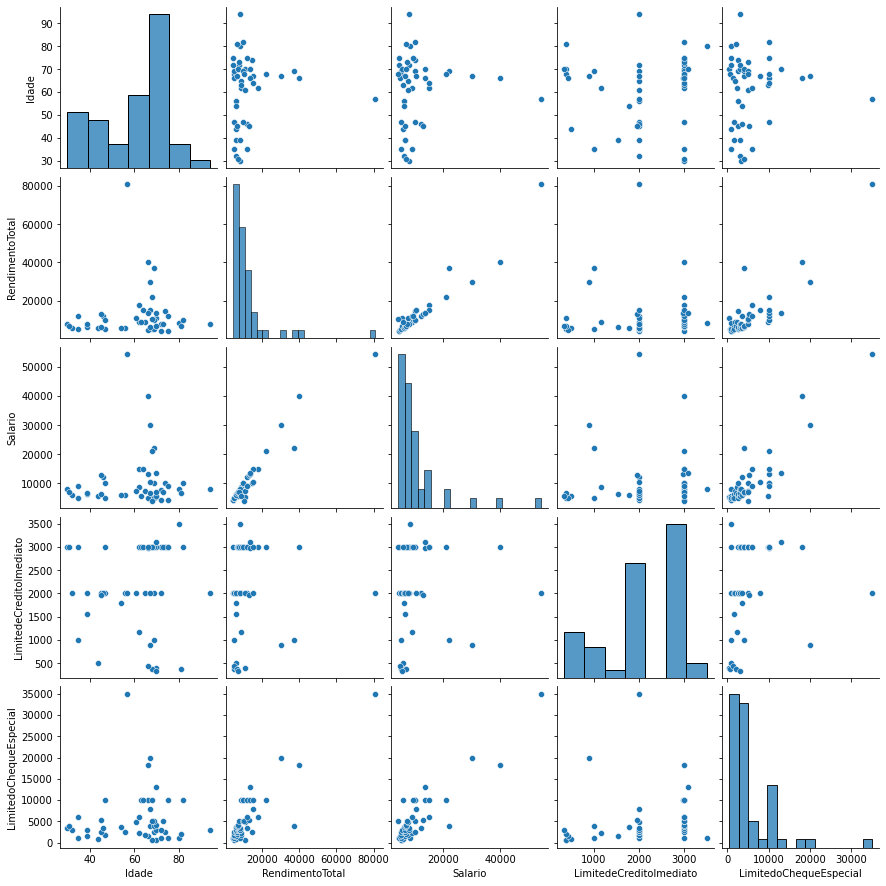

In [8]:
# Análise Exploratória Bivariada
sns.pairplot(dados_lim_cred_esc)

In [9]:
# Matriz de correlação
round(dados_lim_cred_esc.corr(),2)

,Idade,RendimentoTotal,Salario,LimitedeCreditoImediato,LimitedoChequeEspecial
Idade,1.00,0.07,0.06,0.06,0.08
RendimentoTotal,0.07,1.00,0.96,0.03,0.86
Salario,0.06,0.96,1.00,0.08,0.89
LimitedeCreditoImediato,0.06,0.03,0.08,1.00,0.23
LimitedoChequeEspecial,0.08,0.86,0.89,0.23,1.00


<AxesSubplot:>

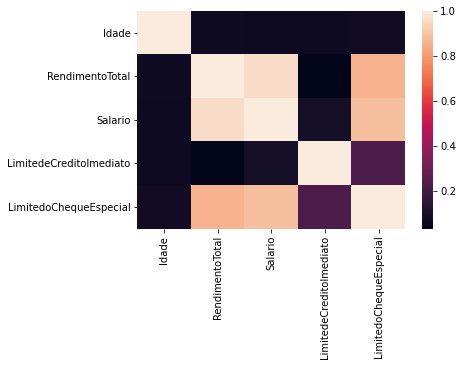

In [10]:
# Mapa de calor da matriz de correlação, usando seaboarn (sns)
sns.heatmap(dados_lim_cred_esc.corr())

### Análise bivariada: qualitativa x quantitativa

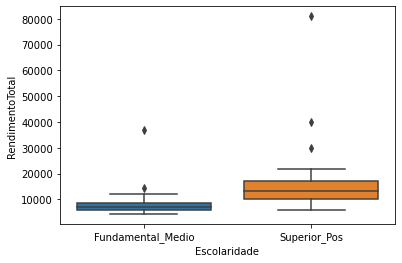

In [13]:
boxplot_b_1 = sns.boxplot(x="Escolaridade", y="RendimentoTotal",
                 data=dados_lim_cred_esc)

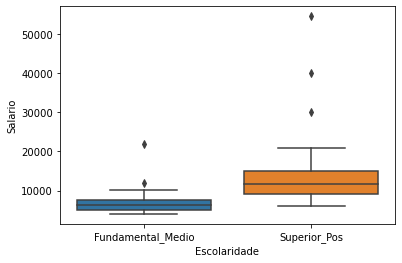

In [14]:
boxplot_b_2 = sns.boxplot(x="Escolaridade", y="Salario",
                 data=dados_lim_cred_esc)

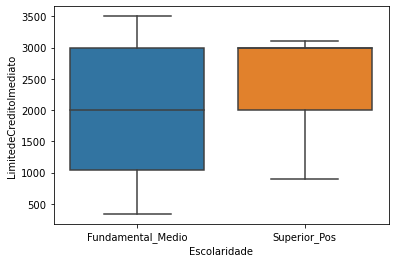

In [15]:
boxplot_b_3 = sns.boxplot(x="Escolaridade", y="LimitedeCreditoImediato",
                 data=dados_lim_cred_esc)

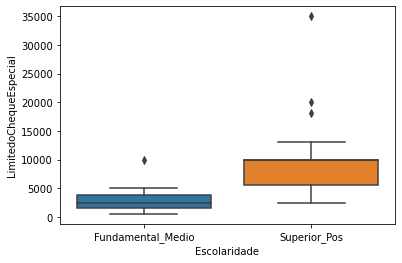

In [16]:
boxplot_b_4 = sns.boxplot(x="Escolaridade", y="LimitedoChequeEspecial",
                 data=dados_lim_cred_esc)

# Regressão Linear

### Statsmodels
É um módulo que fornece classes e funções para estimação de modelos estatísticos, realizando testes estatísticos e exploração estatística de dados
https://www.statsmodels.org/stable/index.html

In [17]:
#import statsmodels.api as sm
import statsmodels.formula.api as smf

In [18]:
# Ajuste do modelo de Regressão Linear
lm_esc = smf.ols(formula='LimitedoChequeEspecial ~ Salario + LimitedeCreditoImediato + Escolaridade', 
                 data=dados_lim_cred_esc).fit()

# Saída do modelo
lm_esc.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                              OLS Regression Results                              
==================================================================================
Dep. Variable:     LimitedoChequeEspecial   R-squared:                       0.842
Model:                                OLS   Adj. R-squared:                  0.831
Method:                     Least Squares   F-statistic:                     77.92
Date:                    Wed, 06 Jan 2021   Prob (F-statistic):           1.23e-17
Time:                            22:55:23   Log-Likelihood:                -442.00
No. Observations:                      48   AIC:                             892.0
Df Residuals:                          44   BIC:                             899.5
Df Model:                               3                                         
Covariance Type:                nonrobust                                         
================================================================================================
                                   coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------------------
Intercept                    -2321.6598    996.379     -2.330      0.024   -4329.730    -313.590
Escolaridade[T.Superior_Pos]  2445.0910    883.237      2.768      0.008     665.045    4225.137
Salario                          0.5171      0.045     11.524      0.000       0.427       0.607
LimitedeCreditoImediato          0.7322      0.407      1.801      0.079      -0.087       1.552
==============================================================================
Omnibus:                        2.831   Durbin-Watson:                   1.957
Prob(Omnibus):                  0.243   Jarque-Bera (JB):                1.912
Skew:                           0.257   Prob(JB):                        0.384
Kurtosis:                       3.831   Cond. No.                     3.93e+04
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 3.93e+04. This might indicate that there are
strong multicollinearity or other numerical problems.
"""